# Gold Price Prediction

#### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


#### Data Collection and Processing

In [6]:
# loading the csv data to a Pandas Dataframe
gold_data=pd.read_csv("E:\Data Science Projects\Machine learning\\gld_price_data.csv")

In [7]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
# print first 5 rows in the dataframe
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# print last 5 rows of the dataframe
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [11]:
# getting some basic informations aboutbthe data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 98.5+ KB


In [12]:
# checking the number of missing valus
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Correlation: 1.Positive correlation, 2.Negative correlation

In [14]:
correlation=gold_data.corr()

<AxesSubplot:>

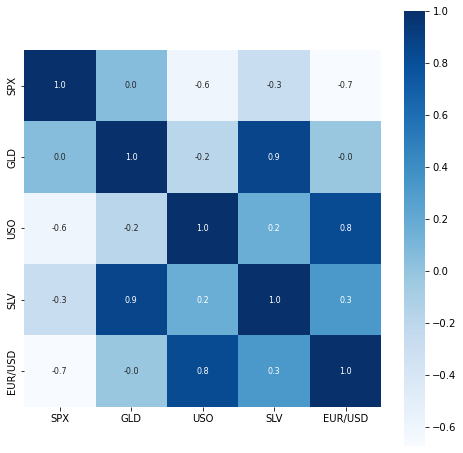

In [16]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [17]:
# correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<AxesSubplot:xlabel='GLD', ylabel='Density'>

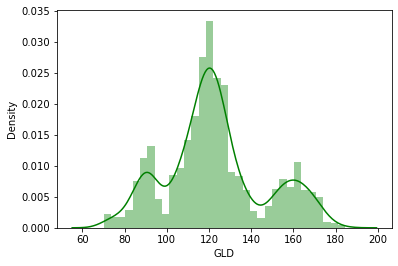

In [19]:
# checking the distribution of the GLD prices
sns.distplot(gold_data['GLD'],color='green')

#### Splitting the Features and Target

In [20]:
X=gold_data.drop(['Date','GLD'],axis=1)

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
Y=gold_data['GLD']

In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into training data and test data


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

#### Model Training Random Forest Regressor

In [26]:
regressor=RandomForestRegressor(n_estimators=100)

In [28]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

#### Model Evaluation

In [29]:
# prediction on test data
test_data_prediction=regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.62059938  82.04089989 116.06840003 127.70140086 120.9792014
 154.69879772 150.44999785 126.0896002  117.64359885 125.91560121
 116.63010111 171.5693005  141.67409764 167.89599852 114.99439992
 117.66260031 139.87700256 170.14890127 159.26920382 156.91069968
 155.19500036 124.86620023 175.93909934 157.46000337 125.25060043
  93.88679934  78.01190011 120.36940033 119.11459919 167.39609994
  88.11590066 125.3104      91.18740037 117.65280054 121.12529949
 136.85030004 115.43810117 115.08130069 147.3549997  107.36040098
 104.08870228  87.20749806 126.60890047 118.14269976 153.74739889
 119.73640002 108.32089981 108.15889799  93.08490035 127.20729763
  74.82100007 113.74889944 121.20950024 111.17229893 118.87099888
 120.5146995  159.67979975 169.17310181 146.98019712  85.81739863
  94.26819998  86.80839911  90.49109986 119.06900069 126.47250059
 127.47589992 169.33090018 122.25399907 117.25199914  98.80180042
 168.06190157 142.87669854 132.05700247 121.12200233 121.17829956
 119.568300

In [31]:
# R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [32]:
print("R squared error",error_score)

R squared error 0.9887208808927437


#### Compare the Actual values and Predicted values in a plot


In [34]:
Y_test=list(Y_test)

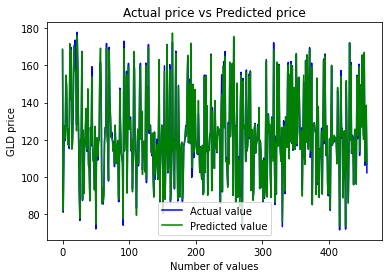

In [35]:
plt.plot(Y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title("Actual price vs Predicted price")
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()